In [ ]:
'''Q.2.Temperature Forecast Project using ML
Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv
'''

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [ ]:
 ''' Data Preprocessing'''

In [2]:
df.shape # to check the dimension of the data set (rows, columns)

(7752, 25)

In [3]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

print(df.head())

   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \


In [4]:
print(df.tail(10))

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54

In [5]:
df.dtypes #Checking the types of columns

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [6]:
#checking the null/ missing Values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
df.info() #detailed information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
# Handle missing values
df = df.dropna()
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [9]:
#Again checking the null/ missing Values
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [10]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-07-2013' in DD/MM/YYYY format. Provide format or specif

In [11]:
# Extract features from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

C:\Users\riki\AppData\Local\Temp\ipykernel_13148\4047463520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\riki\AppData\Local\Temp\ipykernel_13148\4047463520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
C:\Users\riki\AppData\Local\Temp\ipykernel_13148\4047463520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [12]:
# Drop the original 'Date' column
df = df.drop(['Date'], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


In [ ]:
'''Exploratory Data Analysis (EDA)'''

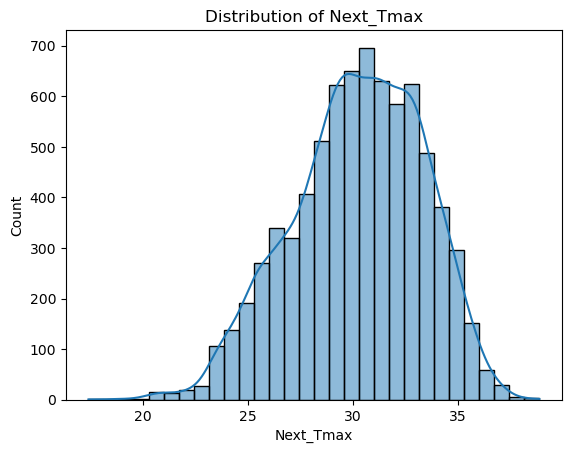

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze the distribution of target variables
sns.histplot(df['Next_Tmax'], bins=30, kde=True)
plt.title('Distribution of Next_Tmax')
plt.show()


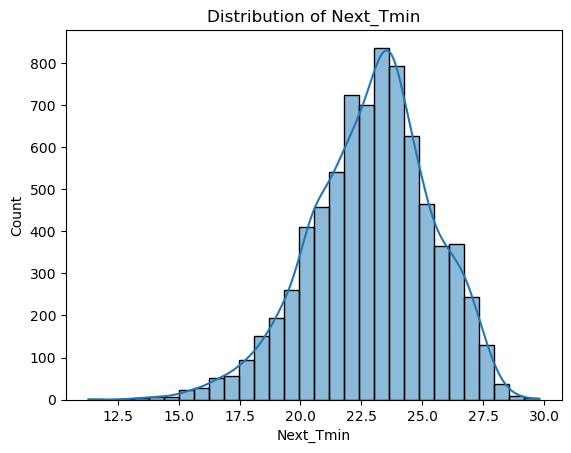

In [16]:
sns.histplot(df['Next_Tmin'], bins=30, kde=True)
plt.title('Distribution of Next_Tmin')
plt.show()

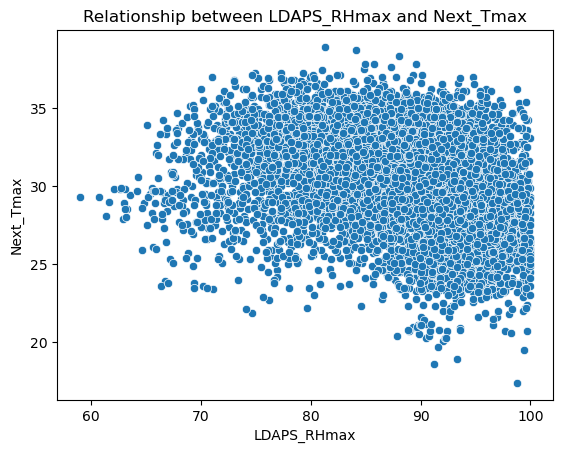

In [15]:
# Explore relationships between features and target variables
sns.scatterplot(x='LDAPS_RHmax', y='Next_Tmax', data=df)
plt.title('Relationship between LDAPS_RHmax and Next_Tmax')
plt.show()


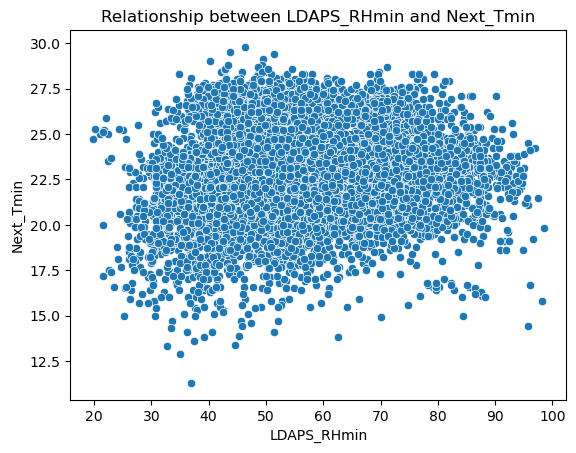

In [16]:
sns.scatterplot(x='LDAPS_RHmin', y='Next_Tmin', data=df)
plt.title('Relationship between LDAPS_RHmin and Next_Tmin')
plt.show()

In [ ]:
''' Data Splitting'''

In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max = df['Next_Tmax']
y_min = df['Next_Tmin']

X_train, X_test, y_max_train, y_max_test, y_min_train, y_min_test = train_test_split(X, y_max, y_min, test_size=0.2, random_state=42)


In [18]:
'''Model Selection'''

from sklearn.ensemble import RandomForestRegressor

# Choose Random Forest Regression as the model
model_max = RandomForestRegressor()
model_min = RandomForestRegressor()


In [19]:
'''Model Training'''
# Train the models
model_max.fit(X_train, y_max_train)
model_min.fit(X_train, y_min_train)


RandomForestRegressor()

In [20]:
'''Model Evaluation'''
from sklearn.metrics import mean_absolute_error

# Make predictions on the test set
y_max_pred = model_max.predict(X_test)
y_min_pred = model_min.predict(X_test)

# Evaluate the models
mae_max = mean_absolute_error(y_max_test, y_max_pred)
mae_min = mean_absolute_error(y_min_test, y_min_pred)

print(f'MAE for Next_Tmax: {mae_max}')
print(f'MAE for Next_Tmin: {mae_min}')


MAE for Next_Tmax: 0.7049466403162051
MAE for Next_Tmin: 0.5781646903820821


In [22]:
'''Hyperparameter Tuning [Fine-tune the hyperparameters of models to achieve better performance. we can use techniques like grid search or randomized search to explore different combinations of hyperparameters]'''

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [23]:
# Perform grid search for the max temperature model
grid_search_max = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search_max.fit(X_train, y_max_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [24]:
# Perform grid search for the min temperature model
grid_search_min = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search_min.fit(X_train, y_min_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [25]:
# Get the best parameters
best_params_max = grid_search_max.best_params_
best_params_min = grid_search_min.best_params_

# Update the models with the best parameters
model_max.set_params(**best_params_max)
model_min.set_params(**best_params_min)


RandomForestRegressor(max_depth=20, n_estimators=200)

In [26]:
'''Cross-Validation [cross-validation to get a better estimate of the models performance and ensure they generalize well to new data]'''
from sklearn.model_selection import cross_val_score

# Cross-validation for the max temperature model
cv_scores_max = cross_val_score(model_max, X_train, y_max_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_min = cross_val_score(model_min, X_train, y_min_train, cv=5, scoring='neg_mean_absolute_error')

# Print cross-validation scores
print(f'Cross-Validation Scores for Next_Tmax: {-cv_scores_max.mean()}')
print(f'Cross-Validation Scores for Next_Tmin: {-cv_scores_min.mean()}')


Cross-Validation Scores for Next_Tmax: 0.7240829307057638
Cross-Validation Scores for Next_Tmin: 0.58719072615655


In [27]:
'''Feature Importance'''
# Get feature importances for the max temperature model
feature_importances_max = model_max.feature_importances_

# Get feature importances for the min temperature model
feature_importances_min = model_min.feature_importances_

# Display feature importances
feature_importance_df_max = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_max})
feature_importance_df_min = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_min})

print('Feature Importance for Next_Tmax:')
print(feature_importance_df_max.sort_values(by='Importance', ascending=False))

print('\nFeature Importance for Next_Tmin:')
print(feature_importance_df_min.sort_values(by='Importance', ascending=False))


Feature Importance for Next_Tmax:
             Feature  Importance
5   LDAPS_Tmax_lapse    0.693472
1       Present_Tmax    0.051927
9          LDAPS_CC1    0.028952
11         LDAPS_CC3    0.022177
12         LDAPS_CC4    0.021010
7           LDAPS_WS    0.019718
6   LDAPS_Tmin_lapse    0.014346
2       Present_Tmin    0.013548
24               Day    0.012623
10         LDAPS_CC2    0.012542
8           LDAPS_LH    0.012260
21   Solar radiation    0.012215
3        LDAPS_RHmin    0.012050
4        LDAPS_RHmax    0.010246
23             Month    0.008944
22              Year    0.007936
14        LDAPS_PPT2    0.007835
0            station    0.007438
13        LDAPS_PPT1    0.007083
15        LDAPS_PPT3    0.004902
18               lon    0.004604
19               DEM    0.004222
16        LDAPS_PPT4    0.004196
17               lat    0.002927
20             Slope    0.002828

Feature Importance for Next_Tmin:
             Feature  Importance
6   LDAPS_Tmin_lapse    0.786858
2      

In [28]:
'''Save Models'''

import joblib

# Save models to files
joblib.dump(model_max, 'model_max.pkl')
joblib.dump(model_min, 'model_min.pkl')


['model_min.pkl']